Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
Limpeza e tratamento de dados

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
#importar dados
dataset = pd.read_csv("../dados/tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#explorar dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

In [ ]:
agrupado.plot.bar(color = 'gray')

In [7]:
#aparencia
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

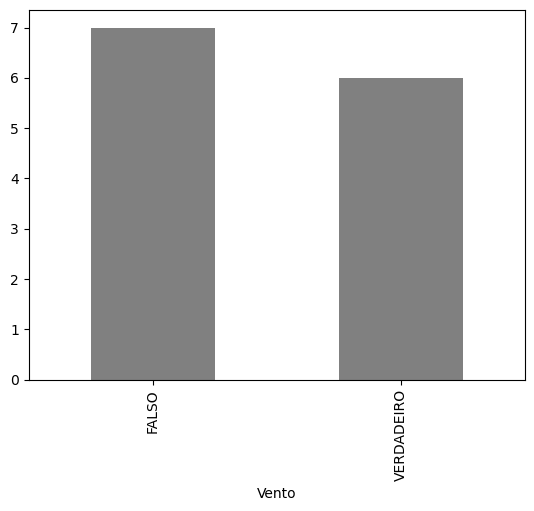

In [10]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

In [ ]:
agrupado.plot.bar(color = 'gray')

In [6]:
#explorar colunas numéricas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

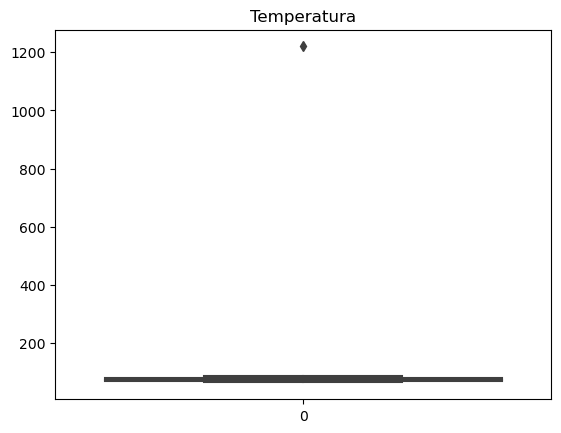

In [12]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\lucal\AppData\Local\Temp\ipykernel_10776\1502053818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

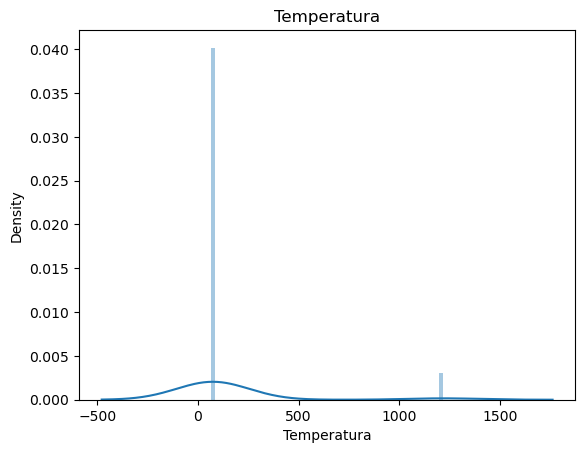

In [13]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [ ]:
#Umidade
dataset['Umidade'].describe()

In [ ]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [ ]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [ ]:
#contamos valores NAN
dataset.isnull().sum()

In [ ]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

In [ ]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "Sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

In [14]:
#temperatura fora do dominio
dataset['Temperatura']

0       85
1       80
2       83
3       70
4       68
5       65
6       64
7     1220
8       69
9       75
10      75
11      72
12      81
13      71
Name: Temperatura, dtype: int64

In [11]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

In [ ]:
#substituir
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [ ]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

In [ ]:
#umidade, dominio e NAs
agrupado = dataset.groupby(['Umidade']).size()
agrupado

In [ ]:
#total de Nas
dataset['Umidade'].isnull().sum()

In [ ]:
#calular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

In [ ]:
#preenche NAs
dataset['Umidade'].fillna(mediana, inplace=True)

In [ ]:
dataset['Umidade'].isnull().sum()

In [ ]:
#visuliza de acordo com o dominio de acordo com o dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

In [ ]:
#atualiza comm mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [ ]:
#visuliza novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

In [ ]:
#Vemtos
agrupado = dataset.groupby(['Vento']).size()
agrupado

In [ ]:
#total de Nas
dataset['Vento'].isnull().sum()

In [ ]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace=True)

In [ ]:
#total de Nas
dataset['Vento'].isnull().sum()